# HSE 2021: Mathematical Methods for Data Analysis

## Homework 5

**Warning 1**: You have 3 weeks for this assignemnt.  **it is better to start early (!)**

**Warning 2**: it is critical to describe and explain what you are doing and why, use markdown cells

### Contents

#### PCA, t-SNE – 1.25 points
* [Task 1](#task1) (0.5 points)
* [Task 2](#task2) (0.25 points)
* [Task 3](#task3) (0.25 points)
* [Task 4](#task4) (0.25 points)

#### Clustering – 4.25 points
* [Task 5](#task5) (1.5 points)
* [Task 6](#task6) (1.25 points)
* [Task 7](#task7) (0.5 points)
* [Task 8](#task8) (1 point)

#### EM-algorithm – 4.5 points

* [Task 9](#task9) (1 point)
* [Task 10](#task10) (1 point)
* [Task 11](#task11) (1.25 points)
* [Task 12](#task12) (1.25 points)

Download the file `data_Mar_64.txt`.

In [1]:
#!wget https://raw.githubusercontent.com/AKuzina/ml_se/main/hw/hw_5/data_Mar_64.txt

In [2]:
import pandas as pd
data = pd.read_csv('data_Mar_64.txt', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,Acer Campestre,0.003906,0.003906,0.027344,0.033203,0.007812,0.017578,0.023438,0.005859,0.000000,...,0.011719,0.000000,0.005859,0.035156,0.027344,0.033203,0.001953,0.000000,0.017578,0.0
1,Acer Campestre,0.005859,0.013672,0.027344,0.025391,0.013672,0.029297,0.019531,0.000000,0.001953,...,0.017578,0.000000,0.021484,0.017578,0.046875,0.005859,0.003906,0.003906,0.046875,0.0
2,Acer Campestre,0.011719,0.001953,0.027344,0.044922,0.017578,0.042969,0.023438,0.000000,0.003906,...,0.035156,0.000000,0.015625,0.021484,0.056641,0.009766,0.003906,0.000000,0.015625,0.0
3,Acer Campestre,0.013672,0.011719,0.037109,0.017578,0.011719,0.087891,0.023438,0.000000,0.000000,...,0.015625,0.001953,0.021484,0.029297,0.033203,0.003906,0.000000,0.001953,0.027344,0.0
4,Acer Campestre,0.007812,0.009766,0.027344,0.025391,0.001953,0.005859,0.015625,0.000000,0.005859,...,0.023438,0.001953,0.021484,0.048828,0.056641,0.019531,0.000000,0.000000,0.013672,0.0


This [dataset](https://archive.ics.uci.edu/ml/datasets/One-hundred+plant+species+leaves+data+set) consists of work carried out by James Cope, Charles Mallah, and James Orwell, Kingston University London. The Leaves were collected in the Royal Botanic Gardens, Kew, UK. 

For Each feature, a 64 element vector is given per sample of leaf. One file for each 64-element feature vectors. **Each row begins with the class label**. Here is the plant leaf **classification task**. The remaining 64 elements is the feature vector.

In [3]:
#Sixteen samples of leaf each of one-hundred plant species
data.shape

(1600, 65)

The first column is the target, put it in a separate variable.

In [4]:
import numpy as np
X, y_name = np.array(data.iloc[:, 1:]), data.iloc[:, 0]

**Task 1. <a id="task1"></a> (0.5 points)** Let's do the following pipeline (detailed instructions will be in next cells)

- Encode your textual target.
- Split your data into train and test. Train a simple classification model without any improvements and calculate metrics.
- Then let's look at the low dimensional representations of the features and look at the classes there. We will use linear method PCA and non-linear t-SNE (t-distributed stochastic neighbor embedding). In this task we learn how to visualize data at the low dimensional space and check whether the obtained points are separable or not.

The target variable takes a text value. Use the `LabelEncoder` from `sklearn` to encode the text variable `y_name` and save the resulting values to the variable `y`.

In [5]:
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(y_name)

Split your data into **train** and **test**.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train a simple classifier on your data to predict target. Calculate accuracy, F-score.

In [37]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

clf = SVC(C=100, kernel='linear', random_state=42)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)

print(f'Accuracy = {accuracy_score(y_test, pred):.3f}')
print(f'F1-score = {f1_score(y_test, pred, average="weighted"):.3f}')

Accuracy = 0.828
F1-score = 0.827


Let's try Principal Component Analysis. Use the `PCA` method from `sklearn.decomposiion` to reduce the dimension of the feature space to two. Fix `random_state=0`

In [8]:
from sklearn.decomposition import PCA

X_pca = PCA(n_components=2, random_state=0).fit_transform(X)

Select objects that match values from 0 to 14 of the target variable `y`. Draw the selected objects in a two-dimensional feature space using the `scatter` method from `matplotlib.pyplot`. To display objects of different classes in different colors, pass `c = y[y<15]` to the `scatter` method.

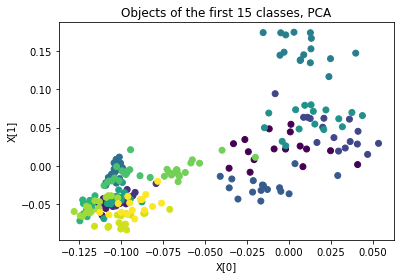

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

xs = X_pca[y<15]

plt.title('Objects of the first 15 classes, PCA')
plt.scatter(xs[:, 0], xs[:, 1], c=y[y<15])
plt.xlabel('X[0]')
plt.ylabel('X[1]')

plt.show()

Do the same procedure as in two previous cells, but now for the `TSNE` method from `sklearn.manifold`.

In [10]:
from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=2, random_state=0).fit_transform(X)

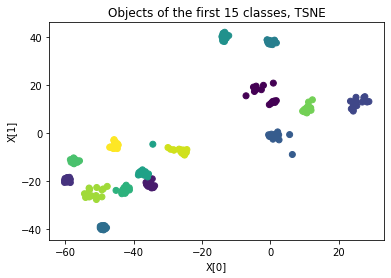

In [11]:
xs = X_tsne[y<15]

plt.title('Objects of the first 15 classes, TSNE')
plt.scatter(xs[:, 0], xs[:, 1], c=y[y<15])
plt.xlabel('X[0]')
plt.ylabel('X[1]')

plt.show()

**Task 2. <a id="task2"></a> (0.25 points)** Specify the coordinates of the object with index 0 (`X[0]`) after applying the TSNE method. Round the numbers to hundredths.

In [12]:
cords_1_tsne = np.round(X_tsne[0], 2)
cords_1_tsne

array([-7.12, 15.6 ], dtype=float32)

**Task 3. <a id="task3"></a> (0.25 points)** Specify the coordinates of the object with index 0 (`X[0]`) after applying the PCA method. Round the numbers to hundredths.

In [13]:
cords_1_pca = np.round(X_pca[0], 2)
cords_1_pca

array([-0.03,  0.03])

**Task 4. <a id="task4"></a> (0.25 points)** What conclusions can be drawn from the obtained images? Choose the right one(s).

1) Using the principal components method, it was possible to visualize objects on a plane and objects of different classes are visually separable

2) Using the TSNE method, it was possible to visualize objects on a plane and objects of different classes are visually separable

3) Using the TSNE and PCA methods, it was possible to visualize objects on a plane and objects of different classes are visually separable

4) Using the TSNE and PCA methods, it was possible to visualize objects on a plane and objects of different classes are not visually separable

2

## K_means

**Task 5. <a id="task5"></a> (1.5 points)** Implement the MyKMeans class.

The class must match the template shown below. Please, add code where needed. Some guidelines are the following:

The class constructor is passed to:
- n_clusters - the number of clusters that the data will be split into

- n_iters - the maximum number of iterations that can be done in this algorithm

Realize `update_centers` and `update_labels` methods.


In the `fit` method:

- Write sequential call of `self_centers` and `self_labels`.

then in the loop by the number of iterations you need to implement:
- calculate the nearest cluster center for each object
- recalculate the center of each cluster (the average of each of the coordinates of all objects assigned to this cluster)
put the calculated new cluster centers in the `new_centers` variable

In the `predict` method:

the nearest cluster centers for `X` objects are calculated

In [14]:
from IPython.display import clear_output
from sklearn.metrics import pairwise_distances_argmin

def plot_clust(X, centers, lables, ax): 
    ax.scatter(X[:,0], X[:,1], c=lables)
    ax.scatter(centers[:,0], centers[:,1], marker='>', color='red')


class MyKMeans():
    def __init__(self, n_clusters=3, n_iters=100, seed=None):
        self.n_clusters = n_clusters
        self.labels = None 
        self.centers = None 
        self.n_iters = n_iters
        self.seed = 0 if seed is None else seed
        np.random.seed(self.seed)

    def update_centers(self, X):
        centers = np.empty((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            centers[i] = X[self.labels == i].mean(axis=0)
        return centers 
    
    def update_lables(self, X):
        labels = pairwise_distances_argmin(X, self.centers)
        return labels

    def fit(self, X):
        self.centers = np.random.uniform(low=X.min(axis=0),
                                         high=X.max(axis=0),
                                         size=(self.n_clusters, X.shape[1]))
        
        self.labels = self.update_lables(X)

        for it in range(self.n_iters):
            new_labels = self.update_lables(X)
            self.labels = new_labels

            new_centers = self.update_centers(X)
            if np.allclose(self.centers.flatten(), new_centers.flatten(), atol=1e-1):
                self.centers = new_centers
                self.labels = new_labels
                print('Converge by tolerance centers')

                fig, ax = plt.subplots(1,1)
                plot_clust(X, new_centers, new_labels, ax)
                return 0
      
            self.centers = new_centers

            fig, ax = plt.subplots(1,1)
            plot_clust(X, new_centers, new_labels, ax)
            plt.pause(0.3);
            clear_output(wait=True);

        return 1
    
    def predict(self, X):
        labels = self.update_lables(X)
        return labels

Generating data for clustering

In [15]:
from sklearn import datasets
n_samples = 1000

noisy_blobs = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 0.5, 0.5],
                             random_state=0)

In [16]:
X, y = noisy_blobs

**Task 6. <a id="task6"></a> (1.25 points)** 

6.1 Cluster noisy_blobs objects with `MyKMeans`, use the hyperparameters `n_clusters=3`, `n_iters=100`. Specify the response for the object with index 1.

Converge by tolerance centers
Response for X[1] is 0


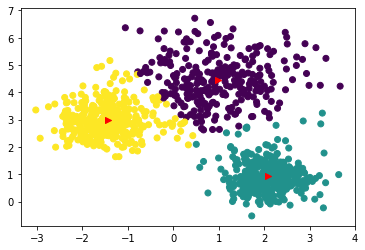

In [17]:
model = MyKMeans(n_clusters=3, n_iters=100)
model.fit(X)
print(f'Response for X[1] is {model.predict(X[1].reshape(1, -1))[0]}')

6.2 Cluster noisy_blobs objects, use the hyperparameters `n_clusters=3`, `n_iters = 5`. Specify the response for the object with index 1.

Converge by tolerance centers
Response for X[1] is 0


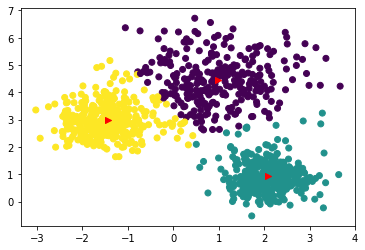

In [18]:
model = MyKMeans(n_clusters=3, n_iters=5)
model.fit(X)
print(f'Response for X[1] is {model.predict(X[1].reshape(1, -1))[0]}')

6.3 Calculate how many objects changed the label of the predicted cluster when changing the hyperparameter n_iters from 5 to 100

In [19]:
model = MyKMeans(n_clusters=3, n_iters=5)
model.fit(X)

labels1 = model.predict(X)

model = MyKMeans(n_clusters=3, n_iters=100)
model.fit(X)

labels2 = model.predict(X)

plt.close()
clear_output()

num_of_changed = np.count_nonzero(labels1 - labels2)
print(f'{num_of_changed} labels has been changed')

0 labels has been changed


## DBSCAN

**Task 7. <a id="task7"></a> (0.5 points)** Cluster noisy_blobs objects using DBSCAN. Use the DBSCAN implementation from sklearn. Fix the `eps=0.5` hyperparameter. Specify the response for the object with index 1.

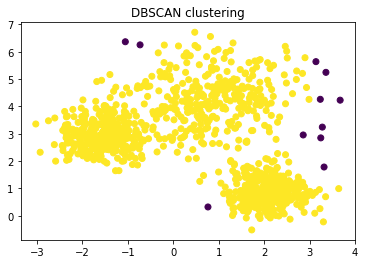

In [20]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.5).fit(X)

plt.title('DBSCAN clustering')
plt.scatter(X[:, 0], X[:, 1], c=model.labels_)
plt.show()

In [21]:
print(f'Response for X[1] is {model.labels_[1]}')

Response for X[1] is 0


**Task 8. <a id="task8"></a> (1 point)** 8.1 Specify the resulting number of clusters

In [22]:
clusters = np.unique(model.labels_)
clusters = clusters[clusters != -1]

num_of_clusters = len(clusters)
print(f'Number of clusters is {num_of_clusters}')

Number of clusters is 1


8.2 How many objects were counted as outliers (marked -1)?

In [23]:
num_of_outliers = len(model.labels_[model.labels_ == -1])

print(f'Number of outliers is {num_of_outliers}')

Number of outliers is 11


## Implementing EM for GMM

**Multivariate Gaussian mixture model**

A Bayesian Gaussian mixture model is commonly extended to fit a vector of unknown parameters (denoted in bold), or multivariate normal distributions.  In a multivariate distribution (i.e. one modelling a vector $\boldsymbol{x}$ with $N$ random variables) one may model a vector of parameters (such as several observations of a signal or patches within an image) using a Gaussian mixture model prior distribution on the vector of estimates given by

$p(\boldsymbol{\theta}) = \sum_{i=1}^K\phi_i \mathcal{N}(\boldsymbol{\mu_i,\Sigma_i})$

where the $i^{th}$ vector component is characterized by normal distributions with weights $\phi_i$, means $\boldsymbol{\mu_i}$ and covariance matrices $\boldsymbol{\Sigma_i}$. To incorporate this prior into a Bayesian estimation, the prior is multiplied with the known distribution $p(\boldsymbol{x | \theta})$ of the data $\boldsymbol{x}$ conditioned on the parameters $\boldsymbol{\theta}$ to be estimated.  With this formulation, the posterior distribution $p(\boldsymbol{\theta | x})$ is *also* a Gaussian mixture model of the form

$p(\boldsymbol{\theta | x}) = \sum_{i=1}^K\tilde{\phi_i} \mathcal{N}(\boldsymbol{\tilde{\mu_i},\tilde{\Sigma_i}})$

with new parameters $\tilde{\phi_i}, \boldsymbol{\tilde{\mu_i}}$ and $\boldsymbol{\tilde{\Sigma_i}}$ that are updated using the Expectation-maximization algorithm.

### Reminder

Remember, that EM algorithm is a coordinate descent optimization of variational lower bound $\mathcal{L}(\theta, q) = \int q(T) \log\frac{p(X, T|\theta)}{q(T)}dT\to \max$.

<b>E-step</b>:<br>
$\mathcal{L}(\theta, q) \to \max\limits_{q} \Leftrightarrow \mathcal{KL} [q(T) \,\|\, p(T|X, \theta)] \to \min \limits_{q\in Q} \Rightarrow q(T) = p(T|X, \theta)$<br>
<b>M-step</b>:<br> 
$\mathcal{L}(\theta, q) \to \max\limits_{\theta} \Leftrightarrow \mathbb{E}_{q(T)}\log p(X,T | \theta) \to \max\limits_{\theta}$

For GMM, $\theta$ is a set of parameters that consists of mean vectors $\mu_c$, covariance matrices $\Sigma_c$ and priors $\pi_c$ for each component.

Latent variables $T$ are indices of components to which each data point is assigned, i.e. $t_i$  is the cluster index for object $x_i$.

The joint distribution can be written as follows: $\log p(T, X \mid \theta) =  \sum\limits_{i=1}^N \log p(t_i, x_i \mid \theta) = \sum\limits_{i=1}^N \sum\limits_{c=1}^C q(t_i = c) \log \left (\pi_c \, f_{\!\mathcal{N}}(x_i \mid \mu_c, \Sigma_c)\right)$,
where $f_{\!\mathcal{N}}(x \mid \mu_c, \Sigma_c) = \frac{1}{\sqrt{(2\pi)^n|\boldsymbol\Sigma_c|}}
\exp\left(-\frac{1}{2}({x}-{\mu_c})^T{\boldsymbol\Sigma_c}^{-1}({x}-{\mu_c})
\right)$ is the probability density function (pdf) of the normal distribution $\mathcal{N}(x_i \mid \mu_c, \Sigma_c)$.

In this part, we will derive and implement formulas for Gaussian Mixture Model — one of the most commonly used methods for performing soft clustering of the data. 

For debugging, we will use samples from a Gaussian mixture model with unknown mean, variance, and priors. We also added initial values of parameters for grading purposes.

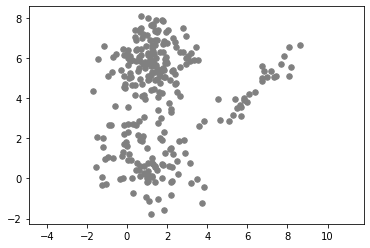

In [24]:
samples = np.load('samples.npz')
X = samples['data']
pi0 = samples['pi0']
mu0 = samples['mu0']
sigma0 = samples['sigma0']
plt.scatter(X[:, 0], X[:, 1], c='grey', s=30)
plt.axis('equal')
plt.show()

### E-step
In this step we need to estimate the posterior distribution over the latent variables with fixed values of parameters: $q_i(t_i) = p(t_i \mid x_i, \theta)$. We assume that $t_i$ equals to the cluster index of the true component of the $x_i$ object. To do so we need to compute $\gamma_{ic} = p(t_i = c \mid x_i, \theta)$. Note that $\sum\limits_{c=1}^C\gamma_{ic}=1$.



<b>Important trick 1:</b> It is important to avoid numerical errors. At some point you will have to compute the formula of the following form: $\frac{e^{y_i}}{\sum_j e^{y_j}}$, which is called _softmax_. When you compute exponents of large numbers, some numbers may become infinity. You can avoid this by dividing numerator and denominator by $e^{\max(y)}$: $\frac{e^{y_i-\max(y)}}{\sum_j e^{y_j - \max(y)}}$. After this transformation maximum value in the denominator will be equal to one. All other terms will contribute smaller values. So, to compute desired formula you first subtract maximum value from each component in vector $\mathbf{y}$ and then compute everything else as before.

<b>Important trick 2:</b> You will probably need to compute formula of the form $A^{-1}x$ at some point. You would normally inverse $A$ and then multiply it by $x$. A bit faster and more numerically accurate way to do this is to directly solve equation $Ay = x$ by using a special function. Its solution is $y=A^{-1}x$, but the equation $Ay = x$ can be solved by methods which do not explicitely invert the matrix. You can use ```np.linalg.solve``` for this.

<b>Other usefull functions: </b> <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.slogdet.html">```slogdet```</a> and <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.det.html#numpy.linalg.det">```det```</a>

<b>Task 9. <a id="task9"></a> (1 point)</b> Implement E-step for GMM using template below.

In [25]:
from scipy.stats import multivariate_normal

def p(X, mu, sigma):
    res = multivariate_normal.pdf(X, mu, sigma)
    res[res == 0] = np.finfo(np.float64).tiny
    return res

In [26]:
def E_step(X, pi, mu, sigma):
    """
    Performs E-step on GMM model
    Each input is numpy array:
    X: (N x d), data points
    pi: (C), mixture component weights 
    mu: (C x d), mixture component means
    sigma: (C x d x d), mixture component covariance matrices
    
    Returns:
    gamma: (N x C), probabilities of clusters for objects
    """
    N = X.shape[0] # number of objects
    C = pi.shape[0] # number of clusters
    d = mu.shape[1] # dimension of each object
    gamma = np.zeros((N, C)) # distribution q(T)

    for i in range(C):
        gamma[:, i] = p(X, mu[i], sigma[i]) * pi[i]
    gamma = (gamma.T / gamma.sum(axis=1)).T
    
    return gamma

In [27]:
gamma = E_step(X, pi0, mu0, sigma0)
print(np.sum(gamma, axis=0))

[125.16650217 154.21348486   0.62001298]


### M-step

In M-step we need to maximize $\mathbb{E}_{q(T)}\log p(X,T | \theta)$ with respect to $\theta$. In our model this means that we need to find optimal values of $\pi$, $\mu$, $\Sigma$. To do so, you need to compute the derivatives and 
set them to zero. You should start by deriving formulas for $\mu$ as it is the easiest part. Then move on to $\Sigma$. Here it is crucial to optimize function w.r.t. to $\Lambda = \Sigma^{-1}$ and then inverse obtained result. Finaly, to compute $\pi$, you will need <a href="https://www3.nd.edu/~jstiver/FIN360/Constrained%20Optimization.pdf">Lagrange Multipliers technique</a> to satisfy constraint $\sum\limits_{c=1}^{C}\pi_c = 1$.

<br>
<b>Important note:</b> You will need to compute derivatives of scalars with respect to matrices. To refresh this technique from previous courses, see <a href="https://en.wikipedia.org/wiki/Matrix_calculus"> wiki article</a> about it . Main formulas of matrix derivatives can be found in <a href="http://www2.imm.dtu.dk/pubdb/views/edoc_download.php/3274/pdf/imm3274.pdf">Chapter 2 of The Matrix Cookbook</a>. For example, there you may find that $\frac{\partial}{\partial A}\log |A| = A^{-T}$.



<b>Task 10. <a id="task10"></a> (1 point)</b> Implement M-step for GMM using template below.

In [28]:
def M_step(X, gamma):
    """
    Performs M-step on GMM model
    Each input is numpy array:
    X: (N x d), data points
    gamma: (N x C), distribution q(T)  
    
    Returns:
    pi: (C)
    mu: (C x d)
    sigma: (C x d x d)
    """
    N = X.shape[0] # number of objects
    C = gamma.shape[1] # number of clusters
    d = X.shape[1] # dimension of each object
    
    mu = np.zeros((C, d))
    sigma = np.zeros((C, d, d))
    pi = np.zeros(C)

    gamma_s = np.sum(gamma, axis = 0)
    for i in range(C):
        mu[i] = np.sum(gamma[:, i] * X.T, axis=1).T / gamma_s[i]
        sigma[i] = ((gamma[:, i] * ((X - mu[i]).T)) @ (X - mu[i])) / gamma_s[i]
        pi[i] = gamma_s[i] / N

    return pi, mu, sigma

In [29]:
gamma = E_step(X, pi0, mu0, sigma0)
pi, mu, sigma = M_step(X, gamma)

### Loss function

Finally, we need some function to track convergence. We will use variational lower bound $\mathcal{L}$ for this purpose. We will stop our EM iterations when $\mathcal{L}$ will saturate. Usually, you will need only about 10-20 iterations to converge. It is also useful to check that this function never decreases during training. If it does, you have a bug in your code.

<b>Task 11. <a id="task11"></a> (1.25 points)</b> Implement a function that will compute $\mathcal{L}$ using template below.

$$\mathcal{L} = \sum_{i=1}^{N} \sum_{c=1}^{C} q(t_i =c) (\log \pi_c + \log f_{\!\mathcal{N}}(x_i \mid \mu_c, \Sigma_c)) - \sum_{i=1}^{N} \sum_{c=1}^{K} q(t_i =c) \log q(t_i =c)$$

**Hint**: Split into three following parts:
- entropy q from scipy
- normal log-prob from scipy
- function that collects it all into a sum

In [30]:
def compute_vlb(X, pi, mu, sigma, gamma):
    """
    Each input is numpy array:
    X: (N x d), data points
    gamma: (N x C), distribution q(T)  
    pi: (C)
    mu: (C x d)
    sigma: (C x d x d)
    
    Returns value of variational lower bound
    """
    N = X.shape[0] # number of objects
    C = gamma.shape[1] # number of clusters
    d = X.shape[1] # dimension of each object

    prob = np.zeros((N, C))
    for i in range(C):
        prob[:, i] = gamma[:, i] * (np.log(pi[i]) + np.log(p(X, mu[i], sigma[i])))
    
    entropy = gamma * np.log(gamma)

    loss = np.sum(prob - entropy)
    return loss

In [31]:
pi, mu, sigma = pi0, mu0, sigma0
gamma = E_step(X, pi, mu, sigma)
pi, mu, sigma = M_step(X, gamma)
loss = compute_vlb(X, pi, mu, sigma, gamma)

### Bringing it all together

Now that we have E step, M step and VLB, we can implement the training loop. We will initialize values of $\pi$, $\mu$ and $\Sigma$ to some random numbers, train until $\mathcal{L}$ stops changing, and return the resulting points. We also know that the EM algorithm converges to local optima. To find a better local optima, we will restart the algorithm multiple times from different (random) starting positions. Each training trial should stop either when maximum number of iterations is reached or when relative improvement is smaller than given tolerance ($|\frac{\mathcal{L}_i-\mathcal{L}_{i-1}}{\mathcal{L}_{i-1}}| \le \text{rtol}$).

Remember, that initial (random) values of $\pi$ that you generate must be non-negative and sum up to 1. Also, $\Sigma$ matrices must be symmetric and positive semi-definite. If you don't know how to generate those matrices, you can use $\Sigma=I$ as initialization.

You will also sometimes get numerical errors because of component collapsing. In this case you just need to add 1e-4 to the diagonals.

<b>Task 12. <a id="task12"></a> (1.25 points)</b> Implement training procedure

In [32]:
def random_params(X, C):
    d = X.shape[1]
    
    pi = np.random.uniform(size=C)
    pi /= pi.sum()
    
    mu = X[np.random.choice(X.shape[0], C, replace = False)]
    
    sigma = np.full((C, d, d), np.random.rand(d, d))
    for i in range(C):
        sigma[i] = sigma[i] @ sigma[i].T
    
    return pi, mu, sigma

In [33]:
def train_EM(X, C, rtol=1e-3, max_iter=100, restarts=10):
    '''
    Starts with random initialization *restarts* times
    Runs optimization until saturation with *rtol* reached
    or *max_iter* iterations were made.
    
    X: (N, d), data points
    C: int, number of clusters
    '''
    N = X.shape[0] # number of objects
    d = X.shape[1] # dimension of each object
    best_loss = None
    best_pi = None
    best_mu = None
    best_sigma = None
    
    best_stop = None
    np.random.seed(42)
    
    for _ in range(restarts):
        try:
            pi, mu, sigma = random_params(X, C)
            
            gamma = E_step(X, pi, mu, sigma)
            pi, mu, sigma = M_step(X, gamma)
            old_loss = loss = compute_vlb(X, pi, mu, sigma, gamma)
            stop = 1
            
            for i in range(1, max_iter):
                stop = i + 1
                gamma = E_step(X, pi, mu, sigma)
                pi, mu, sigma = M_step(X, gamma)
                loss = compute_vlb(X, pi, mu, sigma, gamma)
                
                if np.abs((loss - old_loss) / old_loss) <= rtol:
                    break
                
                old_loss = loss
            
            if best_loss is None or best_loss < loss:
                best_loss = loss
                best_pi = pi
                best_mu = mu
                best_sigma = sigma
                best_stop = stop

        except np.linalg.LinAlgError:
            print("Singular matrix: components collapsed")
            pass
    
    print(f'Converges at {best_stop} iteration')
    return best_loss, best_pi, best_mu, best_sigma

In [34]:
best_loss, best_pi, best_mu, best_sigma = train_EM(X, 3)

Converges at 23 iteration


If you implemented all the steps correctly, your algorithm should converge in about 20 iterations. Let's plot the clusters to see it. We will assign a cluster label as the most probable cluster index. This can be found using a matrix $\gamma$ computed on last E-step. 

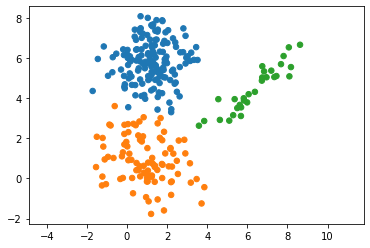

In [35]:
gamma = E_step(X, best_pi, best_mu, best_sigma)
labels = gamma.argmax(axis=1)
colors = np.array([(31, 119, 180), (255, 127, 14), (44, 160, 44)]) / 255.
plt.scatter(X[:, 0], X[:, 1], c=colors[labels], s=30)
plt.axis('equal')
plt.show()